# The Battle of Neighborhoods

### Introduction

Opening a new Italian restaurant in Delhi.

### Business Problem

To find a suitable location to establish a food business where the competition of similar type of cuisine is non existent or minimal. And to analyse the districts and locations to spot a location to setup the restaurant.  

### Source

https://en.wikipedia.org/wiki/List_of_districts_in_India

This data will help in providing locations, districts, codes, pupulation, etc. of Indian States and Union Territories. And accordingly, help in distinguishing locations and point of interests where it will be most beneficial for the business point of view. Using Geolocator Python library to find about the same.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
df = pd.read_excel(r'C:\Users\Shitij\Downloads\capstonedataset.xlsx')
df.head()

,Code,District,Headquarters,Polulation (2011),Area (km^2),Density (/km^2),Latitude,Longitude
0,CD,Central Delhi,Daryaganj,582320,25,27730,28.698548,77.219391
1,ED,East Delhi,Preet Vihar,1709346,440,27132,28.619764,77.309550
2,ND,New Delhi,Connaught Place,142004,22,4057,28.613895,77.209006
3,NE,North East Delhi,Seelampur,2241624,52,36155,28.723308,77.266857
4,NO,North Delhi,Sadar Bazaar,887978,59,14557,28.788600,77.141200


In [2]:
df = df.rename(columns={'Population (2011)': 'Population', 'Area (km^2)': 'Area', 'Density (/km^2)': 'Density'})
df.head(9)

,Code,District,Headquarters,Polulation (2011),Area,Density,Latitude,Longitude
0,CD,Central Delhi,Daryaganj,582320,25,27730,28.698548,77.219391
1,ED,East Delhi,Preet Vihar,1709346,440,27132,28.619764,77.309550
2,ND,New Delhi,Connaught Place,142004,22,4057,28.613895,77.209006
3,NE,North East Delhi,Seelampur,2241624,52,36155,28.723308,77.266857
4,NO,North Delhi,Sadar Bazaar,887978,59,14557,28.788600,77.141200
5,NW,North West Delhi,Kanjhawala,3656539,130,8254,28.718600,77.068500
6,SD,South Delhi,Saket,2731929,250,11060,28.485169,77.196380
7,SW,South West Delhi,Vasant Vihar,2292958,395,5446,28.586448,76.979153
8,WD,West Delhi,Rajouri Garden,2543243,112,19563,28.647952,77.085565


In [3]:
!pip install geopy

In [4]:
address = 'Delhi, IN'
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [5]:
!pip install folium

In [6]:
#map of State using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

## Getting Venues Data using Foursquare

In [7]:
# @hidden_cell

CLIENT_ID = 'NVQS5CCVCU1J4JRL53GP22ZFE3LWYHWE4KJVMCAKIRFXP3ZT' # your Foursquare ID
CLIENT_SECRET = '45SFJQTGR4QY04F5VCNTNWDVHVMBVQR3E03EAKFZMJX1ZINJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NVQS5CCVCU1J4JRL53GP22ZFE3LWYHWE4KJVMCAKIRFXP3ZT
CLIENT_SECRET:45SFJQTGR4QY04F5VCNTNWDVHVMBVQR3E03EAKFZMJX1ZINJ


In [8]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '60e733231ee76458f72df30d'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [9]:
categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [10]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


In [11]:
business_category = []
req_categories = ['Food', 'Shop & Service', 'Travel & Transport']

for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [12]:
LIMIT = 25

def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(business_category)]
    
    return(nearby_venues)

In [13]:
delhi_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Central Delhi
East Delhi
New Delhi
North East Delhi
North Delhi
North West Delhi
South Delhi
South West Delhi
West Delhi


In [14]:
print(delhi_venues.shape)
delhi_venues

(157, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Delhi,28.698548,77.219391,Big Yellow Door,28.693245,77.204948,Café
1,Central Delhi,28.698548,77.219391,Rico's,28.694766,77.204149,Fast Food Restaurant
3,Central Delhi,28.698548,77.219391,The Imperial,28.625548,77.218664,Hotel
5,Central Delhi,28.698548,77.219391,Pandey Paan,28.622249,77.201075,Smoke Shop
7,Central Delhi,28.698548,77.219391,The Lodhi Hotel,28.591669,77.238131,Hotel
...,...,...,...,...,...,...,...
215,West Delhi,28.647952,77.085565,Olive Bar & Kitchen,28.526103,77.183976,Italian Restaurant
217,West Delhi,28.647952,77.085565,Big Yellow Door,28.693245,77.204948,Café
218,West Delhi,28.647952,77.085565,ITC Maurya,28.597130,77.173643,Hotel
221,West Delhi,28.647952,77.085565,L'Opera,28.599784,77.226144,Café


In [15]:
no_venues_in_district = delhi_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Central Delhi,17
1,East Delhi,19
2,New Delhi,17
3,North Delhi,19
4,North East Delhi,19
5,North West Delhi,18
6,South Delhi,17
7,South West Delhi,16
8,West Delhi,15


In [16]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

19

<BarContainer object of 9 artists>

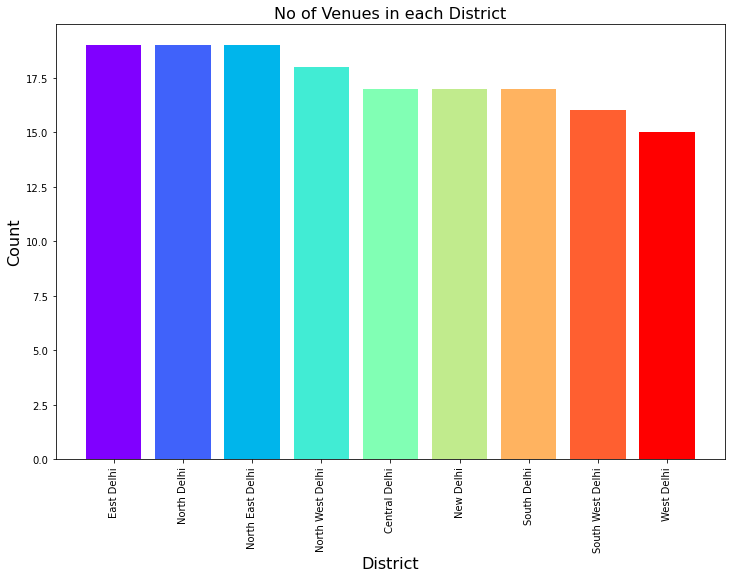

In [18]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

In [19]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 15 uniques categories.


In [20]:
#print unique venue categories
delhi_venues['Venue Category'].unique()

array(['Café', 'Fast Food Restaurant', 'Hotel', 'Smoke Shop',
       'Restaurant', 'Italian Restaurant', 'Indian Restaurant', 'Bakery',
       'Mediterranean Restaurant', 'Asian Restaurant', 'Coffee Shop',
       'Shopping Mall', 'Falafel Restaurant', 'Deli / Bodega', 'Market'],
      dtype=object)

#### Analyse each district

In [21]:
# one hot encoding
delhi_venues_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_venues_onehot['District'] = delhi_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [delhi_venues_onehot.columns[-1]] + list(delhi_venues_onehot.columns[:-1])
delhi_venues_onehot = delhi_venues_onehot[fixed_columns]

delhi_venues_onehot.head()

,District,Asian Restaurant,Bakery,Café,Coffee Shop,Deli / Bodega,Falafel Restaurant,Fast Food Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Market,Mediterranean Restaurant,Restaurant,Shopping Mall,Smoke Shop
0,Central Delhi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Central Delhi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Central Delhi,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Central Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,Central Delhi,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
delhi_venues_onehot.shape

(157, 16)

#### Group rows by districts and by taking the mean of the frequency of occurrence of each category

In [23]:
delhi_venues_grouped = delhi_venues_onehot.groupby('District').mean().reset_index()
delhi_venues_grouped

,District,Asian Restaurant,Bakery,Café,Coffee Shop,Deli / Bodega,Falafel Restaurant,Fast Food Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Market,Mediterranean Restaurant,Restaurant,Shopping Mall,Smoke Shop
0,Central Delhi,0.000000,0.058824,0.176471,0.000000,0.000000,0.000000,0.058824,0.235294,0.176471,0.117647,0.0000,0.058824,0.058824,0.000000,0.058824
1,East Delhi,0.000000,0.052632,0.105263,0.000000,0.000000,0.000000,0.000000,0.210526,0.210526,0.210526,0.0000,0.052632,0.105263,0.000000,0.052632
2,New Delhi,0.058824,0.058824,0.117647,0.000000,0.000000,0.000000,0.000000,0.235294,0.176471,0.176471,0.0000,0.058824,0.058824,0.000000,0.058824
3,North Delhi,0.052632,0.105263,0.157895,0.000000,0.000000,0.000000,0.052632,0.263158,0.157895,0.052632,0.0000,0.052632,0.052632,0.000000,0.052632
4,North East Delhi,0.000000,0.105263,0.157895,0.000000,0.000000,0.000000,0.052632,0.210526,0.157895,0.157895,0.0000,0.052632,0.052632,0.000000,0.052632
5,North West Delhi,0.055556,0.055556,0.166667,0.000000,0.000000,0.000000,0.055556,0.333333,0.111111,0.111111,0.0000,0.000000,0.055556,0.000000,0.055556
6,South Delhi,0.058824,0.058824,0.117647,0.058824,0.058824,0.058824,0.000000,0.235294,0.117647,0.117647,0.0000,0.000000,0.058824,0.058824,0.000000
7,South West Delhi,0.062500,0.062500,0.250000,0.125000,0.000000,0.062500,0.000000,0.250000,0.062500,0.062500,0.0625,0.000000,0.000000,0.000000,0.000000
8,West Delhi,0.066667,0.066667,0.200000,0.000000,0.000000,0.000000,0.000000,0.400000,0.066667,0.066667,0.0000,0.000000,0.066667,0.000000,0.066667


#### Print each District along with the top 5 most common venues

In [24]:
num_top_venues = 5

for hood in delhi_venues_grouped['District']:
    print("----"+hood+"----")
    temp = delhi_venues_grouped[delhi_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Delhi----
                venue  freq
0               Hotel  0.24
1                Café  0.18
2   Indian Restaurant  0.18
3  Italian Restaurant  0.12
4              Bakery  0.06


----East Delhi----
                venue  freq
0               Hotel  0.21
1   Indian Restaurant  0.21
2  Italian Restaurant  0.21
3                Café  0.11
4          Restaurant  0.11


----New Delhi----
                venue  freq
0               Hotel  0.24
1   Indian Restaurant  0.18
2  Italian Restaurant  0.18
3                Café  0.12
4    Asian Restaurant  0.06


----North Delhi----
               venue  freq
0              Hotel  0.26
1               Café  0.16
2  Indian Restaurant  0.16
3             Bakery  0.11
4   Asian Restaurant  0.05


----North East Delhi----
                venue  freq
0               Hotel  0.21
1                Café  0.16
2   Indian Restaurant  0.16
3  Italian Restaurant  0.16
4              Bakery  0.11


----North West Delhi----
                venue  freq

#### Put this into a pandas dataframe

In [25]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = delhi_venues_grouped['District']

for ind in np.arange(delhi_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Central Delhi,Hotel,Indian Restaurant,Café,Italian Restaurant,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Bakery,Shopping Mall
1,East Delhi,Italian Restaurant,Indian Restaurant,Hotel,Restaurant,Café,Smoke Shop,Mediterranean Restaurant,Bakery,Shopping Mall,Market
2,New Delhi,Hotel,Italian Restaurant,Indian Restaurant,Café,Smoke Shop,Restaurant,Mediterranean Restaurant,Bakery,Asian Restaurant,Shopping Mall
3,North Delhi,Hotel,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant
4,North East Delhi,Hotel,Italian Restaurant,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Shopping Mall


#### Cluster districts

In [27]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_venues_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 0, 0, 3, 4, 2, 3])

In [28]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(district_venues_sorted.set_index('District'), on='District')

delhi_merged.head() # check the last columns!

,Code,District,Headquarters,Polulation (2011),Area,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,CD,Central Delhi,Daryaganj,582320,25,27730,28.698548,77.219391,0,Hotel,Indian Restaurant,Café,Italian Restaurant,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Bakery,Shopping Mall
1,ED,East Delhi,Preet Vihar,1709346,440,27132,28.619764,77.309550,1,Italian Restaurant,Indian Restaurant,Hotel,Restaurant,Café,Smoke Shop,Mediterranean Restaurant,Bakery,Shopping Mall,Market
2,ND,New Delhi,Connaught Place,142004,22,4057,28.613895,77.209006,1,Hotel,Italian Restaurant,Indian Restaurant,Café,Smoke Shop,Restaurant,Mediterranean Restaurant,Bakery,Asian Restaurant,Shopping Mall
3,NE,North East Delhi,Seelampur,2241624,52,36155,28.723308,77.266857,0,Hotel,Italian Restaurant,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Shopping Mall
4,NO,North Delhi,Sadar Bazaar,887978,59,14557,28.788600,77.141200,0,Hotel,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant


#### Visualize clusters

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['District'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5 clusters are as follows :

In [34]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,District,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Central Delhi,27730,28.698548,77.219391,0,Hotel,Indian Restaurant,Café,Italian Restaurant,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Bakery,Shopping Mall
3,North East Delhi,36155,28.723308,77.266857,0,Hotel,Italian Restaurant,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Shopping Mall
4,North Delhi,14557,28.788600,77.141200,0,Hotel,Indian Restaurant,Café,Bakery,Smoke Shop,Restaurant,Mediterranean Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant


In [35]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,District,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
1,East Delhi,27132,28.619764,77.309550,1,Italian Restaurant,Indian Restaurant,Hotel,Restaurant,Café,Smoke Shop,Mediterranean Restaurant,Bakery,Shopping Mall,Market
2,New Delhi,4057,28.613895,77.209006,1,Hotel,Italian Restaurant,Indian Restaurant,Café,Smoke Shop,Restaurant,Mediterranean Restaurant,Bakery,Asian Restaurant,Shopping Mall


In [36]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,District,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
7,South West Delhi,5446,28.586448,76.979153,2,Hotel,Café,Coffee Shop,Market,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Bakery,Asian Restaurant,Smoke Shop


In [37]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 3, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,District,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
5,North West Delhi,8254,28.718600,77.068500,3,Hotel,Café,Italian Restaurant,Indian Restaurant,Smoke Shop,Restaurant,Fast Food Restaurant,Bakery,Asian Restaurant,Shopping Mall
8,West Delhi,19563,28.647952,77.085565,3,Hotel,Café,Smoke Shop,Restaurant,Italian Restaurant,Indian Restaurant,Bakery,Asian Restaurant,Shopping Mall,Mediterranean Restaurant


In [38]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 4, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,District,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
6,South Delhi,11060,28.485169,77.19638,4,Hotel,Italian Restaurant,Indian Restaurant,Café,Shopping Mall,Restaurant,Falafel Restaurant,Deli / Bodega,Coffee Shop,Bakery
